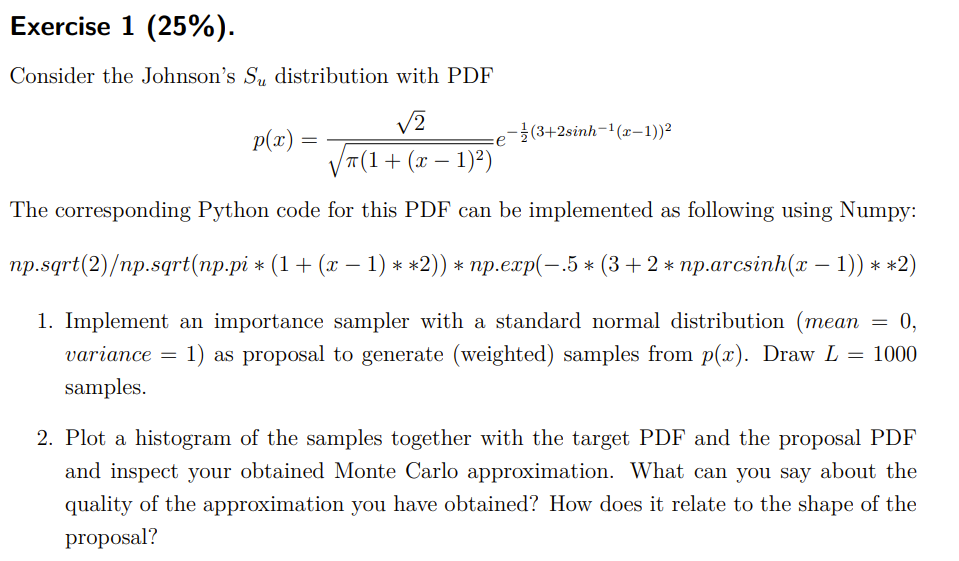

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma

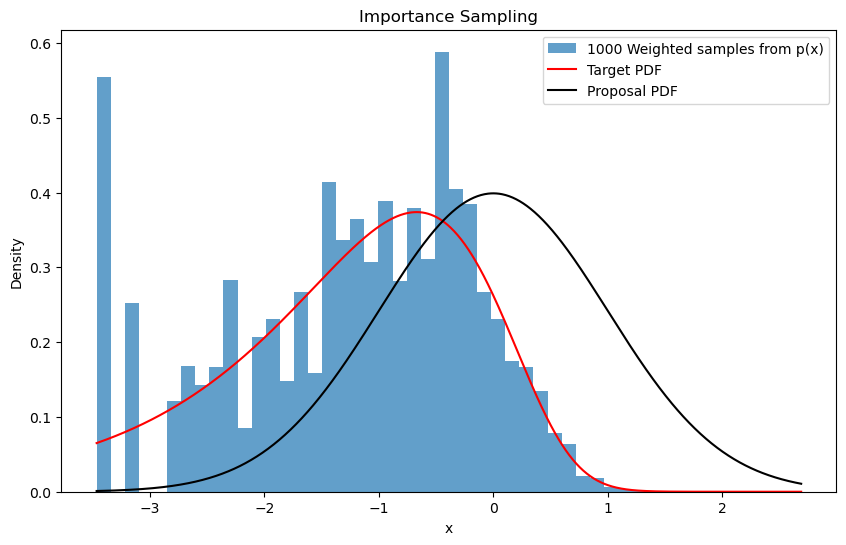

Mean: -1.23091249793912
Variance: 1.1731422733440606


In [2]:
def p(x):
    return np.sqrt(2)/np.sqrt(np.pi * (1 + (x - 1)**2))  * np.exp(-.5 * (3 + 2 * np.arcsinh(x - 1))**2)

def q(x, mean=0, variance=1):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

def importance_sampler(L, mean, variance):
    sample_q = np.random.normal(loc=mean, scale=np.sqrt(variance), size=L)
    importance_weights = p(sample_q) / q(sample_q, variance=variance, mean=mean)
    return sample_q, importance_weights

def estimate_mean_and_variance(samples, weights):
    weighted_mean = np.sum(weights * samples)/np.sum(weights)
    weighted_variance = np.sum(weights * (samples - weighted_mean)**2)/np.sum(weights)
    return weighted_mean, weighted_variance

samples, weights = importance_sampler(1000, 0, 1)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, weights=weights, density=True, alpha=0.7, label='1000 Weighted samples from p(x)')

x_vals = np.linspace(min(samples), max(samples), 1000)
p_vals = p(x_vals)
q_vals = q(x_vals)
plt.plot(x_vals, p_vals, color='red', label='Target PDF')
plt.plot(x_vals, q_vals, color='black', label='Proposal PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Importance Sampling')
plt.legend()
#plt.savefig("E1Q2.png")
plt.show()

mean, variance = estimate_mean_and_variance(samples, weights)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

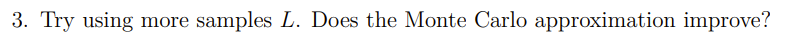

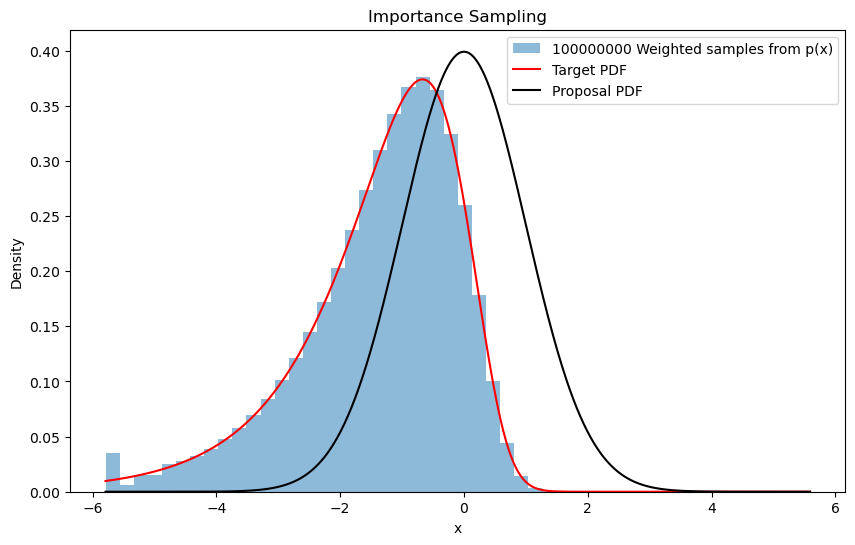

Mean: -1.353819997598968
Variance: 1.5976391924587443


In [3]:
L = int(1e8)
samples, weights = importance_sampler(L, 0, 1)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, weights=weights, density=True, alpha=0.5, label=f'{L} Weighted samples from p(x)')

x_vals = np.linspace(min(samples), max(samples), 1000)
p_vals = p(x_vals)
q_vals = q(x_vals)
plt.plot(x_vals, p_vals, color='red', label='Target PDF')
plt.plot(x_vals, q_vals, color='black', label='Proposal PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Importance Sampling')
plt.legend()
#plt.savefig("E1Q3.png")
plt.show()

mean, variance = estimate_mean_and_variance(samples, weights)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

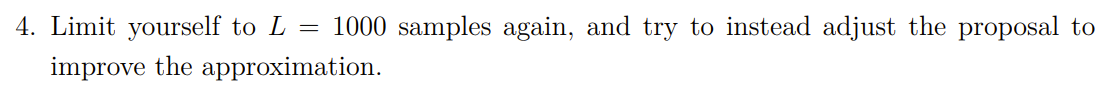

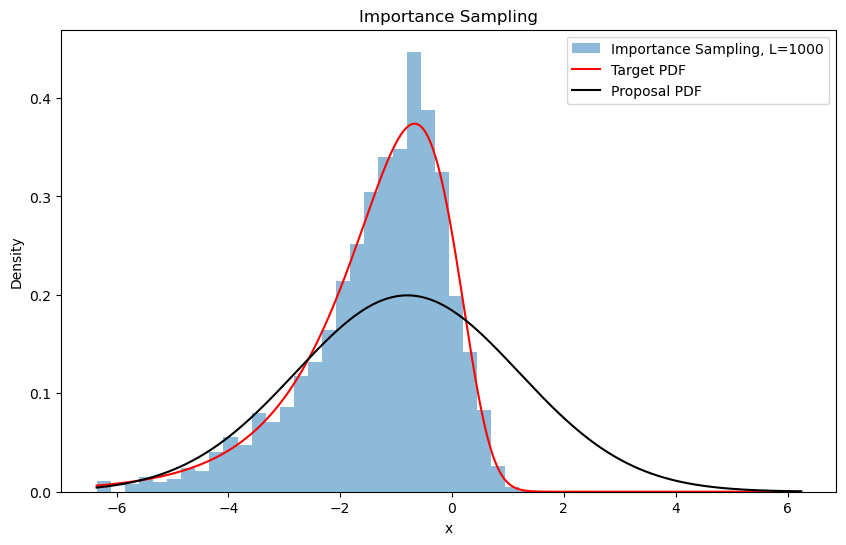

Mean: -1.3219138140429585
Variance: 1.536427784431388


In [66]:
L = 1000
mean = -0.8
variance = 4
samples, weights = importance_sampler(L, mean, variance)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, weights=weights, density=True, alpha=0.5, label=f'Importance Sampling, L={L}')

x_vals = np.linspace(min(samples), max(samples), 1000)
p_vals = p(x_vals)
q_vals = q(x_vals,mean, variance)
plt.plot(x_vals, p_vals, color='red', label='Target PDF')
plt.plot(x_vals, q_vals, color='black', label='Proposal PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Importance Sampling')
plt.legend()
#plt.savefig("E1Q4_1.png")
plt.show()
mean, variance = estimate_mean_and_variance(samples, weights)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

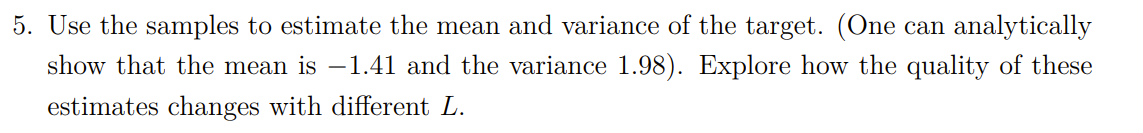

In [5]:
from tqdm import trange, tqdm
different_samples = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
true_mean = -1.41
true_variance = 1.98
mean = 0
variance = 1
number_per_sample = 6

means = []
variances = []
means_error = []
variance_error = []
for s in tqdm(different_samples):
    temp_mean, temp_variance = 0, 0 
    for a in range(number_per_sample):
        samples, weights = importance_sampler(int(s), mean, variance)
        mean_estimate, variance_estimate = estimate_mean_and_variance(samples, weights)
        temp_mean += mean_estimate
        temp_variance += variance_estimate
    means_error.append(np.abs(true_mean-temp_mean/number_per_sample))
    variance_error.append(np.abs(true_variance-temp_variance/number_per_sample))
    means.append(temp_mean/number_per_sample)
    variances.append(temp_variance/number_per_sample)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:29<00:00, 12.82s/it]


In [9]:
for s in range(len(means)): 
    print(f"Samples: {different_samples[s]:^15} Estimated Mean: {means[s]:^15.4f} Mean error: {means_error[s]:^15.4f} Estimated Variance: {variances[s]:^15.4f} Variance Error: {variance_error[s]:^15.4f}")



Samples:       100       Estimated Mean:     -1.0684     Mean error:     0.3416      Estimated Variance:     0.7319      Variance Error:     1.2481     
Samples:      1000       Estimated Mean:     -1.0604     Mean error:     0.3496      Estimated Variance:     0.8599      Variance Error:     1.1201     
Samples:      10000      Estimated Mean:     -1.2228     Mean error:     0.1872      Estimated Variance:     1.1466      Variance Error:     0.8334     
Samples:     100000      Estimated Mean:     -1.2647     Mean error:     0.1453      Estimated Variance:     1.2685      Variance Error:     0.7115     
Samples:     1000000     Estimated Mean:     -1.3963     Mean error:     0.0137      Estimated Variance:     1.7263      Variance Error:     0.2537     
Samples:    10000000     Estimated Mean:     -1.3507     Mean error:     0.0593      Estimated Variance:     1.5816      Variance Error:     0.3984     
Samples:    100000000    Estimated Mean:     -1.3914     Mean error:     0.0186   

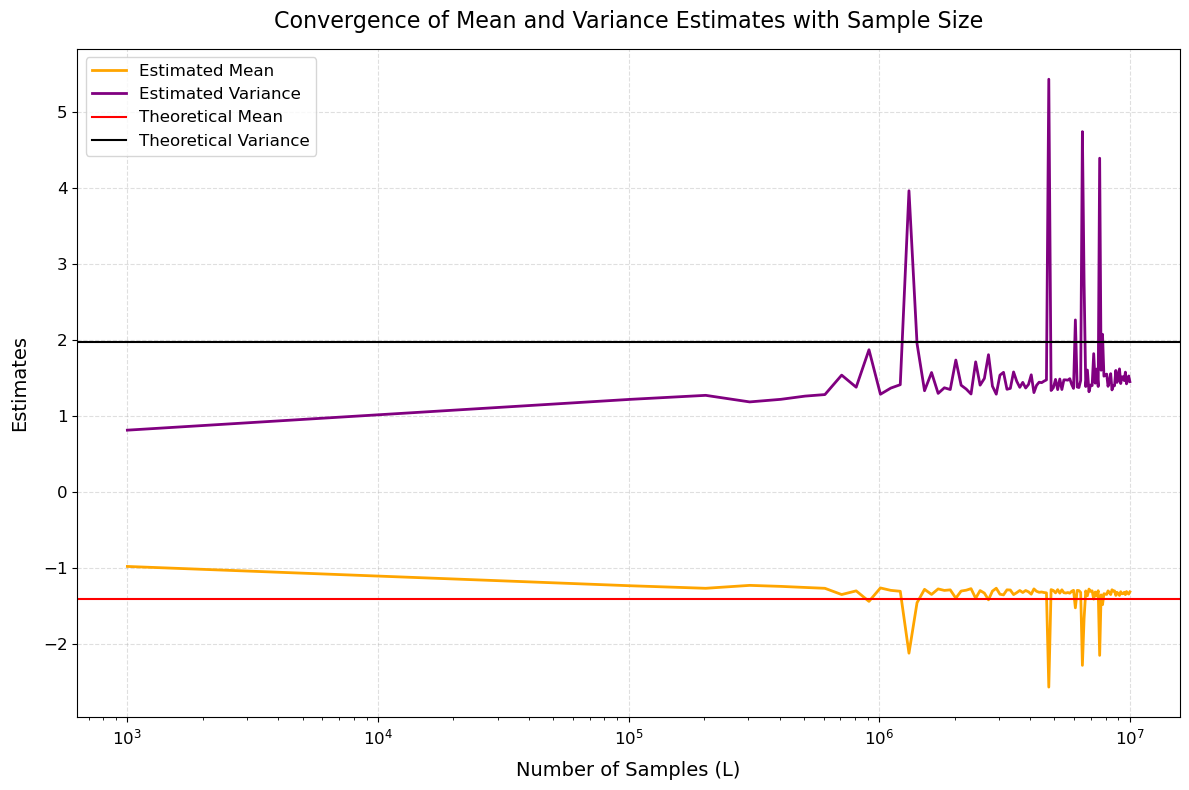

In [81]:
plt.figure(figsize=(12, 8))  
plt.grid(alpha=0.4, linestyle='--') 

plt.plot(different_samples, means, label="Estimated Mean", color="orange", linewidth=2, markersize=6)
plt.plot(different_samples, variances, label="Estimated Variance", color="purple", linewidth=2, markersize=6)

plt.xlabel("Number of Samples (L)", fontsize=14, labelpad=10)  
plt.ylabel("Estimates", fontsize=14, labelpad=10)  
plt.axhline(y=-1.41, label="Theoretical Mean", color="red")
plt.axhline(y=1.98, label="Theoretical Variance", color="black")
plt.title("Convergence of Mean and Variance Estimates with Sample Size", fontsize=16, pad=15)  
plt.legend(fontsize=12, loc="best") 
plt.xscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

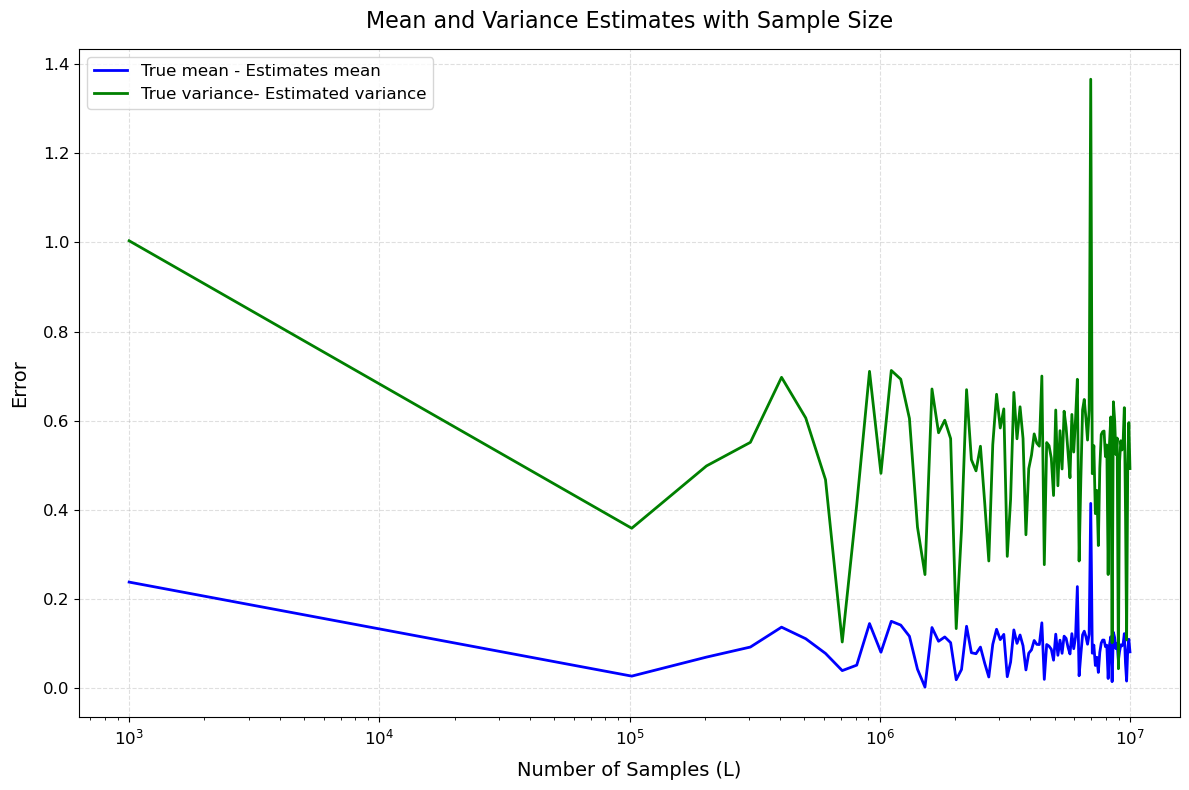

In [77]:
plt.figure(figsize=(12, 8))  
plt.grid(alpha=0.4, linestyle='--') 

plt.plot(different_samples, means_error, label="True mean - Estimates mean", color="blue", linewidth=2, markersize=6)
plt.plot(different_samples, variance_error, label="True variance- Estimated variance", color="green", linewidth=2, markersize=6)

plt.xlabel("Number of Samples (L)", fontsize=14, labelpad=10)  
plt.ylabel("Error", fontsize=14, labelpad=10)  
plt.title("Mean and Variance Estimates with Sample Size", fontsize=16, pad=15)  
plt.legend(fontsize=12, loc="best") 
plt.xscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

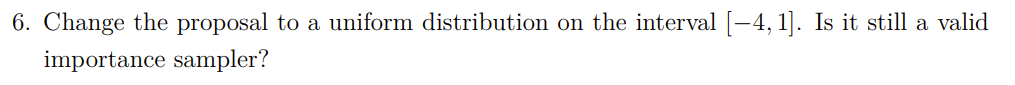

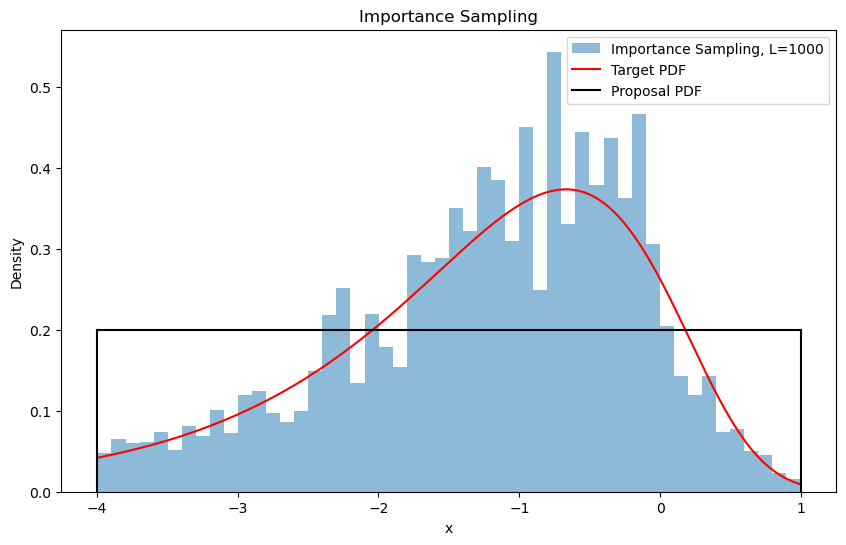

Mean: -1.1978740128883898
Variance: 1.0578525766503895


In [23]:
def new_proposal(x, a, b):
    y = np.where((a <= x) & (x <= b), 1 / (b - a), 0)
    return y

def updated_importance_sampler(L, a, b):
    sample_q = np.random.uniform(a, b, L)
    importance_weights = p(sample_q) / new_proposal(sample_q, a, b)
    return sample_q, importance_weights

L = 1000
a = -4
b = 1
samples, weights = updated_importance_sampler(L, a, b)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, weights=weights, density=True, alpha=0.5, label=f'Importance Sampling, L={L}')

x_vals = np.linspace(min(samples), max(samples), 1000)
p_vals = p(x_vals)
q_vals = new_proposal(x_vals,a, b)
plt.plot(x_vals, p_vals, color='red', label='Target PDF')
plt.plot([-4, -4], [0, 0.2], color="black") 
plt.plot([1, 1], [0, 0.2], color="black") 
plt.plot(x_vals, q_vals, color='black', label='Proposal PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Importance Sampling')
plt.legend()
plt.savefig("E1Q6.png")
plt.show()
mean, variance = estimate_mean_and_variance(samples, weights)
print(f"Mean: {mean}")
print(f"Variance: {variance}")